<h3>Import Libraries</h3>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

<h3>Read CSV</h3>

In [2]:
train=pd.read_csv("bank.csv",delimiter=';')
test=pd.read_csv("test.csv",delimiter=',')

### extract data

In [3]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
test.head()

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown
1,2,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown
2,3,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown
3,4,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown
4,5,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown


### Basic information of Datasets

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


<b style="color:red">Insights</b>
<p><b>(1)In test data, 4521 records and 17 columns.<br>(2)y is target variable<br>(3)No null Values present in data.<b></p>

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427 entries, 0 to 426
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         427 non-null    int64 
 1   age        427 non-null    int64 
 2   job        427 non-null    object
 3   marital    427 non-null    object
 4   education  427 non-null    object
 5   default    427 non-null    object
 6   balance    427 non-null    int64 
 7   housing    427 non-null    object
 8   loan       427 non-null    object
 9   contact    427 non-null    object
 10  day        427 non-null    int64 
 11  month      427 non-null    object
 12  duration   427 non-null    int64 
 13  campaign   427 non-null    int64 
 14  pdays      427 non-null    int64 
 15  previous   427 non-null    int64 
 16  poutcome   427 non-null    object
dtypes: int64(8), object(9)
memory usage: 56.8+ KB


<b style="color:red">Insights</b>
<p><b>(1)In test data, 427 records and 17 columns.<br>(2)No null Values present in data.<br>(3)In train Dataset, Id has unnecessary column. this column not present in Train data. So we can drop it.<b></p>

In [7]:
test=test.iloc[:,1:]

### EDA

In [8]:
cat_cols=train.select_dtypes(include="O").columns
for i in cat_cols:
    print("=="*10)
    print("Name of Columns:-",i)
    print(train[i].value_counts())
    print("=="*10)

Name of Columns:- job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64
Name of Columns:- marital
married     2797
single      1196
divorced     528
Name: marital, dtype: int64
Name of Columns:- education
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64
Name of Columns:- default
no     4445
yes      76
Name: default, dtype: int64
Name of Columns:- housing
yes    2559
no     1962
Name: housing, dtype: int64
Name of Columns:- loan
no     3830
yes     691
Name: loan, dtype: int64
Name of Columns:- contact
cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64
Name of Columns:- month
may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80

In [9]:
cat_cols=test.select_dtypes(include="O").columns
for i in cat_cols:
    print("==================")
    print("Name of Columns:-",i)
    print(test[i].value_counts())
    print("==================")

Name of Columns:- job
blue-collar      115
management        67
technician        67
admin.            64
services          54
retired           22
entrepreneur      12
unemployed         8
self-employed      7
student            6
housemaid          3
unknown            2
Name: job, dtype: int64
Name of Columns:- marital
married     267
single       97
divorced     63
Name: marital, dtype: int64
Name of Columns:- education
secondary    242
tertiary      87
primary       58
unknown       40
Name: education, dtype: int64
Name of Columns:- default
no     423
yes      4
Name: default, dtype: int64
Name of Columns:- housing
yes    370
no      57
Name: housing, dtype: int64
Name of Columns:- loan
no     372
yes     55
Name: loan, dtype: int64
Name of Columns:- contact
unknown    427
Name: contact, dtype: int64
Name of Columns:- month
may    427
Name: month, dtype: int64
Name of Columns:- poutcome
unknown    427
Name: poutcome, dtype: int64


In [10]:
train.duplicated().any()

False

In [11]:
test.duplicated().any()

True

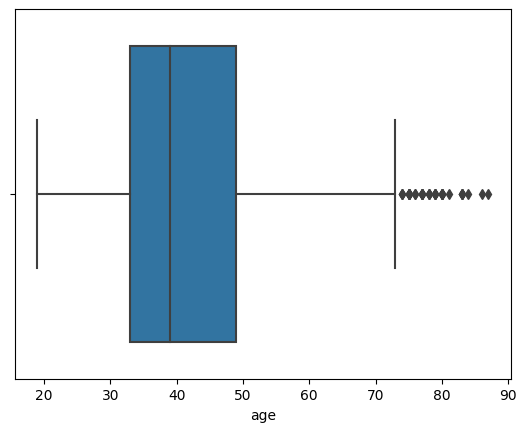

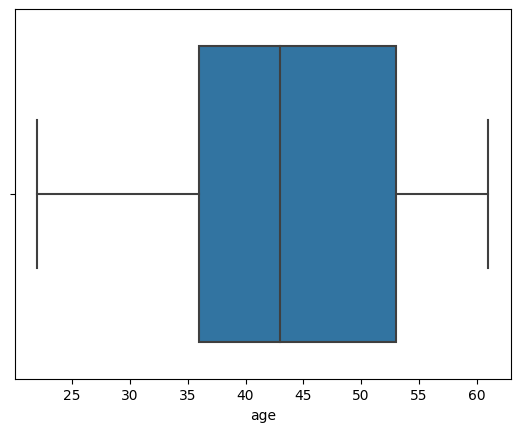

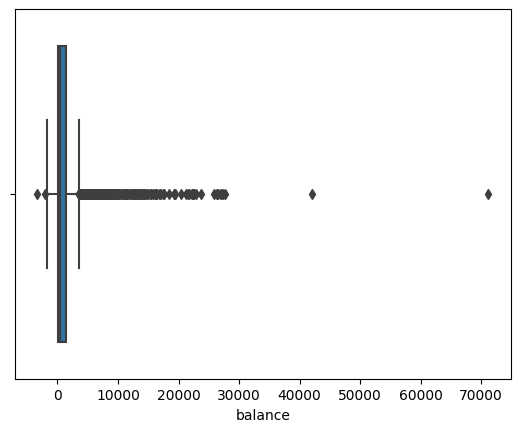

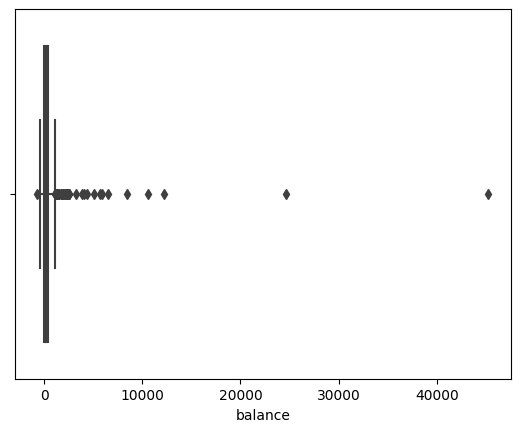

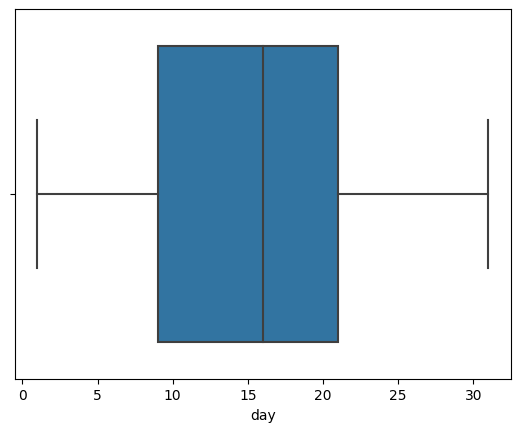

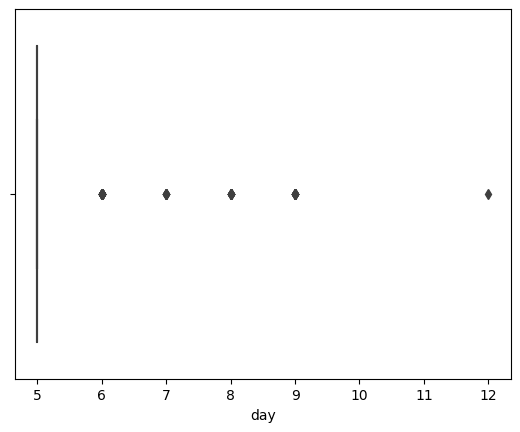

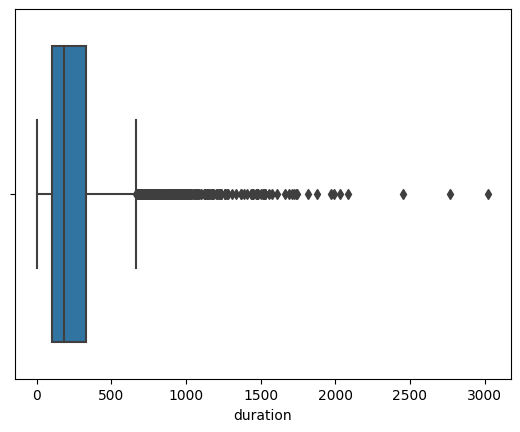

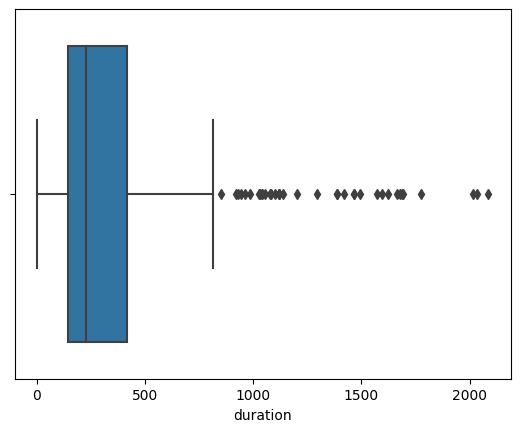

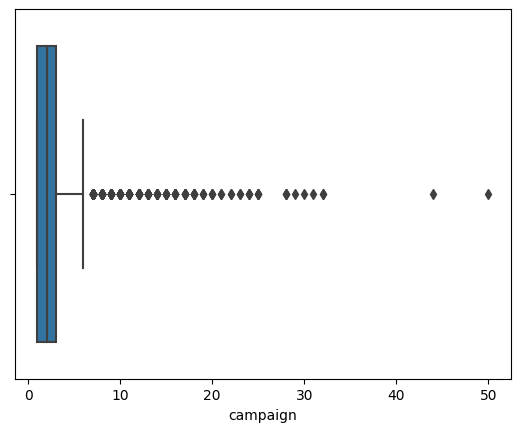

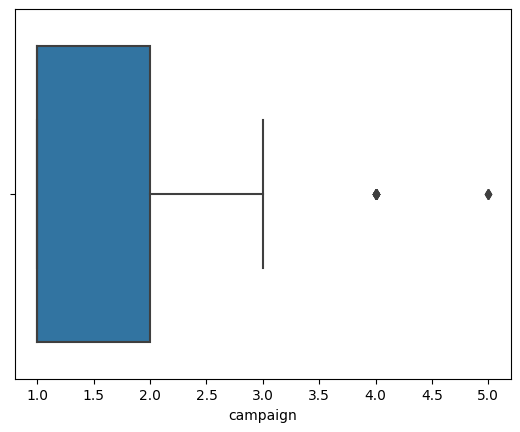

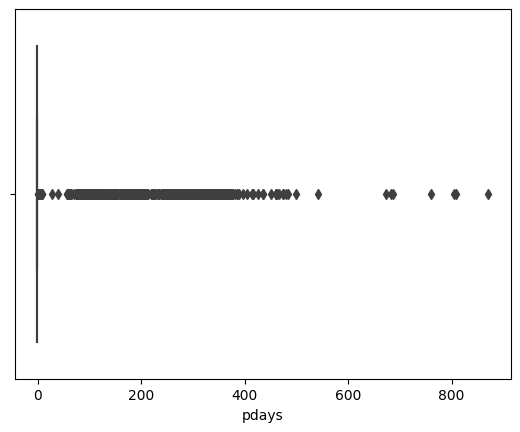

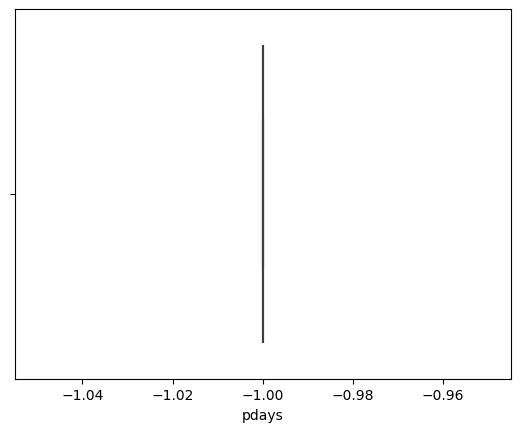

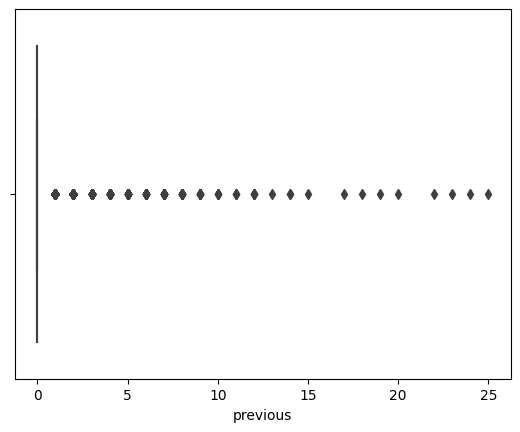

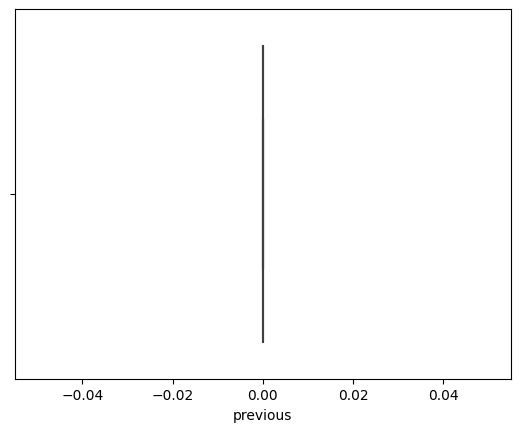

In [12]:
num_cols=train.select_dtypes(include=["int","float"]).columns
for i in num_cols:
    sns.boxplot(train[i])
    plt.show()
    sns.boxplot(test[i])
    plt.show()

<b style="color:red">Insights</b>
<p><b>In test Dataset, age range between 20 to 60 years. <br>So in train dataset we can consider after 78 year  age as a outliers.<br> So we can remove it.<b></p>

In [13]:
train.drop(index=[i for i in train[train['age']>78].index],inplace=True)

<b style="color:red">Insights</b>
<p><b>In test Dataset, balance lie between 0 to 40000. <br>So in train dataset we can consider after 60000 balance are outliers.<br> So we can remove it.<b></p>

In [14]:
train.drop(index=[i for i in train[train['balance']>60000].index],inplace=True)

<b style="color:red">Insights</b>
<p><b>In test Dataset, duration is lies between 0 to 2400 <br>So in train dataset we can consider after 2400  duration as a outliers.<br> So we can remove it.<b></p>

In [15]:
train.drop(index=[i for i in train[train['duration']>2400].index],inplace=True)

<b style="color:red">Insights</b>
<p><b>In Datasets, no of contacts perform before campaign to each client is lies between 1 to 5 times<br>So in train dataset we can consider after range 10 in campaign column as a outliers.<br> So we can remove it.<b></p>

In [16]:
train.drop(index=[i for i in train[train['campaign']>10].index],inplace=True)

<b style="color:red">Insights</b>
<p><b>Previous campaign contact with client not important for recent campaign<br> So we can drop this column.<b></p>

In [17]:
train.drop('pdays',axis=1,inplace=True)
test.drop('pdays',axis=1,inplace=True)

<b style="color:red">Insights</b>
<p><b>In Datasets, no of contacts perform before campaign to each client(previous column) is same like campaign column<br> So we can drop this column.<b></p>

In [18]:
train.drop('previous',axis=1,inplace=True)
test.drop('previous',axis=1,inplace=True)

 <h2 style='color:red'>Visualisation<h2>

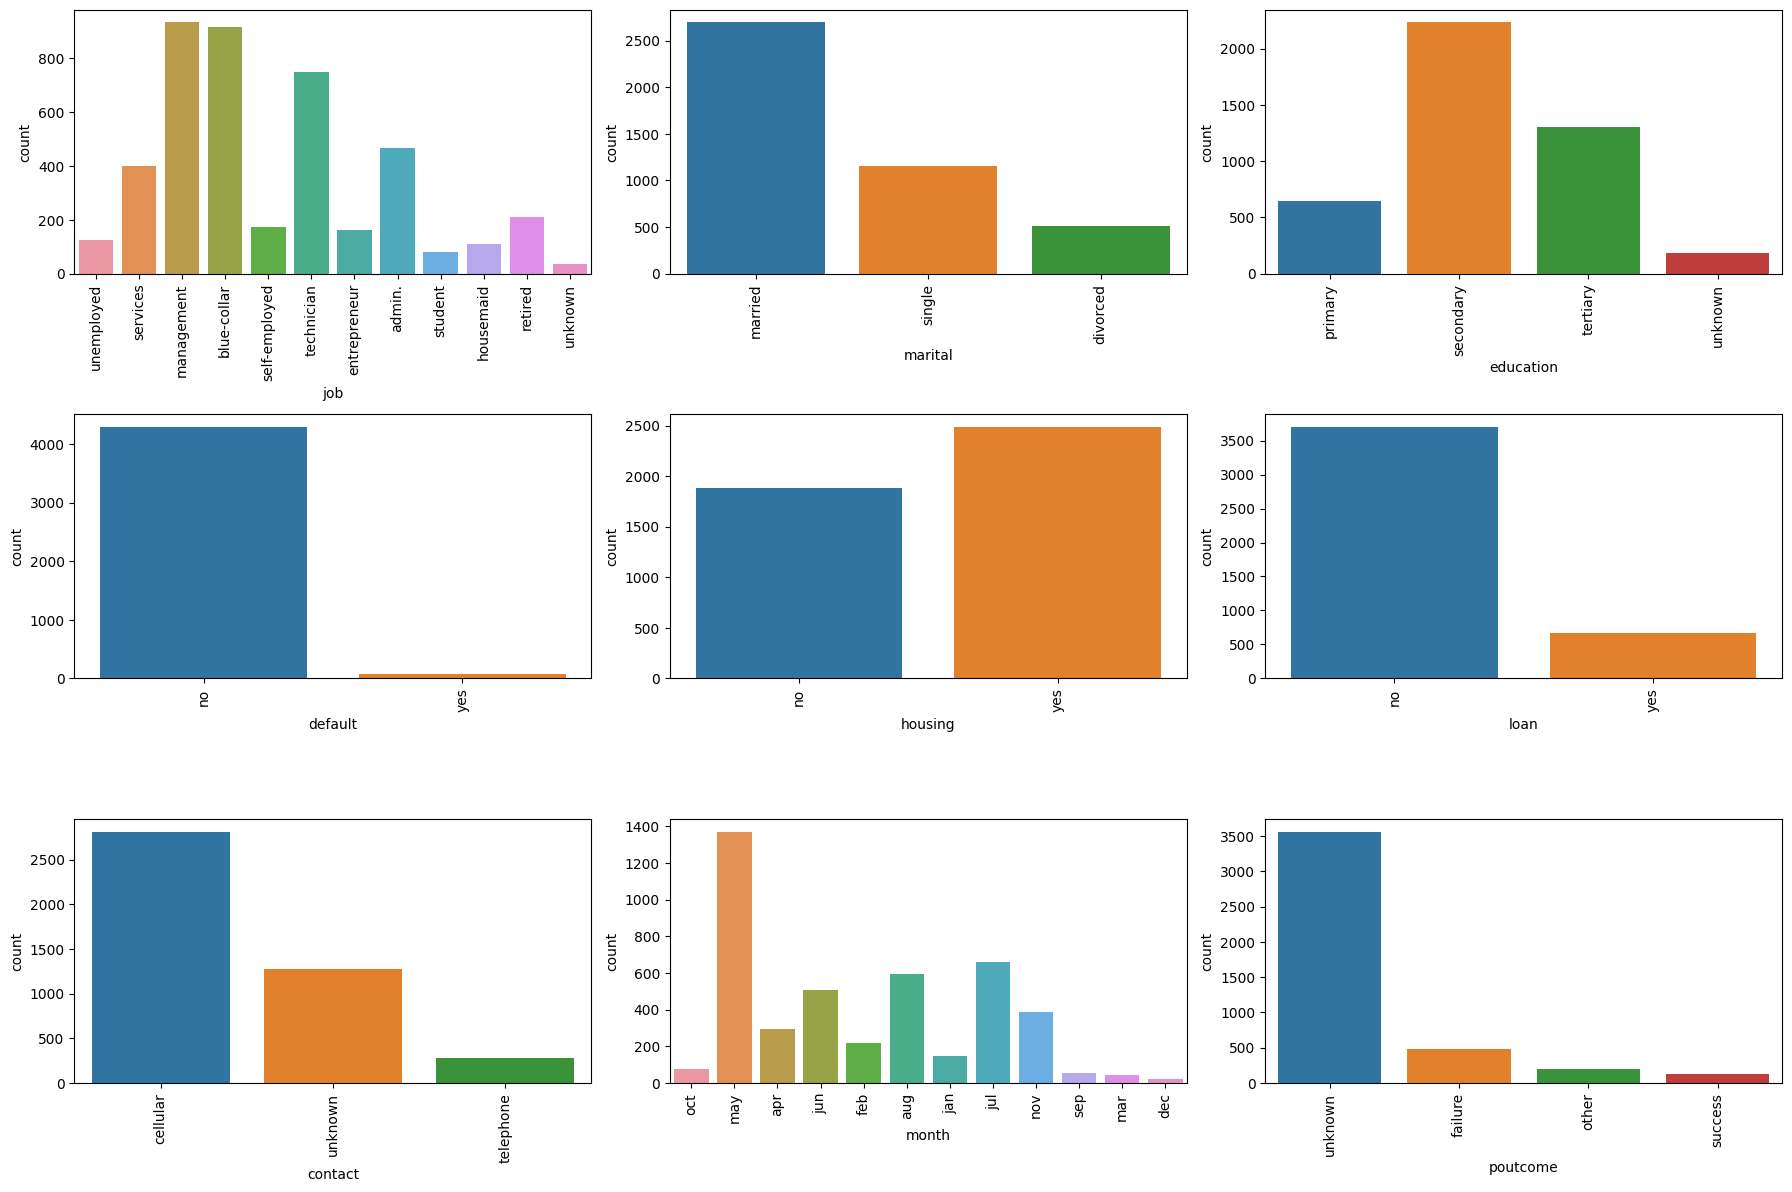

In [19]:
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
for ax in axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(90)

sns.countplot(ax=axes[0, 0], data=train, x='job')
sns.countplot(ax=axes[0, 1], data=train, x='marital')
sns.countplot(ax=axes[0, 2], data=train, x='education')
sns.countplot(ax=axes[1, 0], data=train, x='default')
sns.countplot(ax=axes[1, 1], data=train, x='housing')
sns.countplot(ax=axes[1, 2], data=train, x='loan')
sns.countplot(ax=axes[2, 0], data=train, x='contact')
sns.countplot(ax=axes[2, 1], data=train, x='month')
sns.countplot(ax=axes[2, 2], data=train, x='poutcome')

fig.tight_layout(pad=1.0)
 
plt.show()

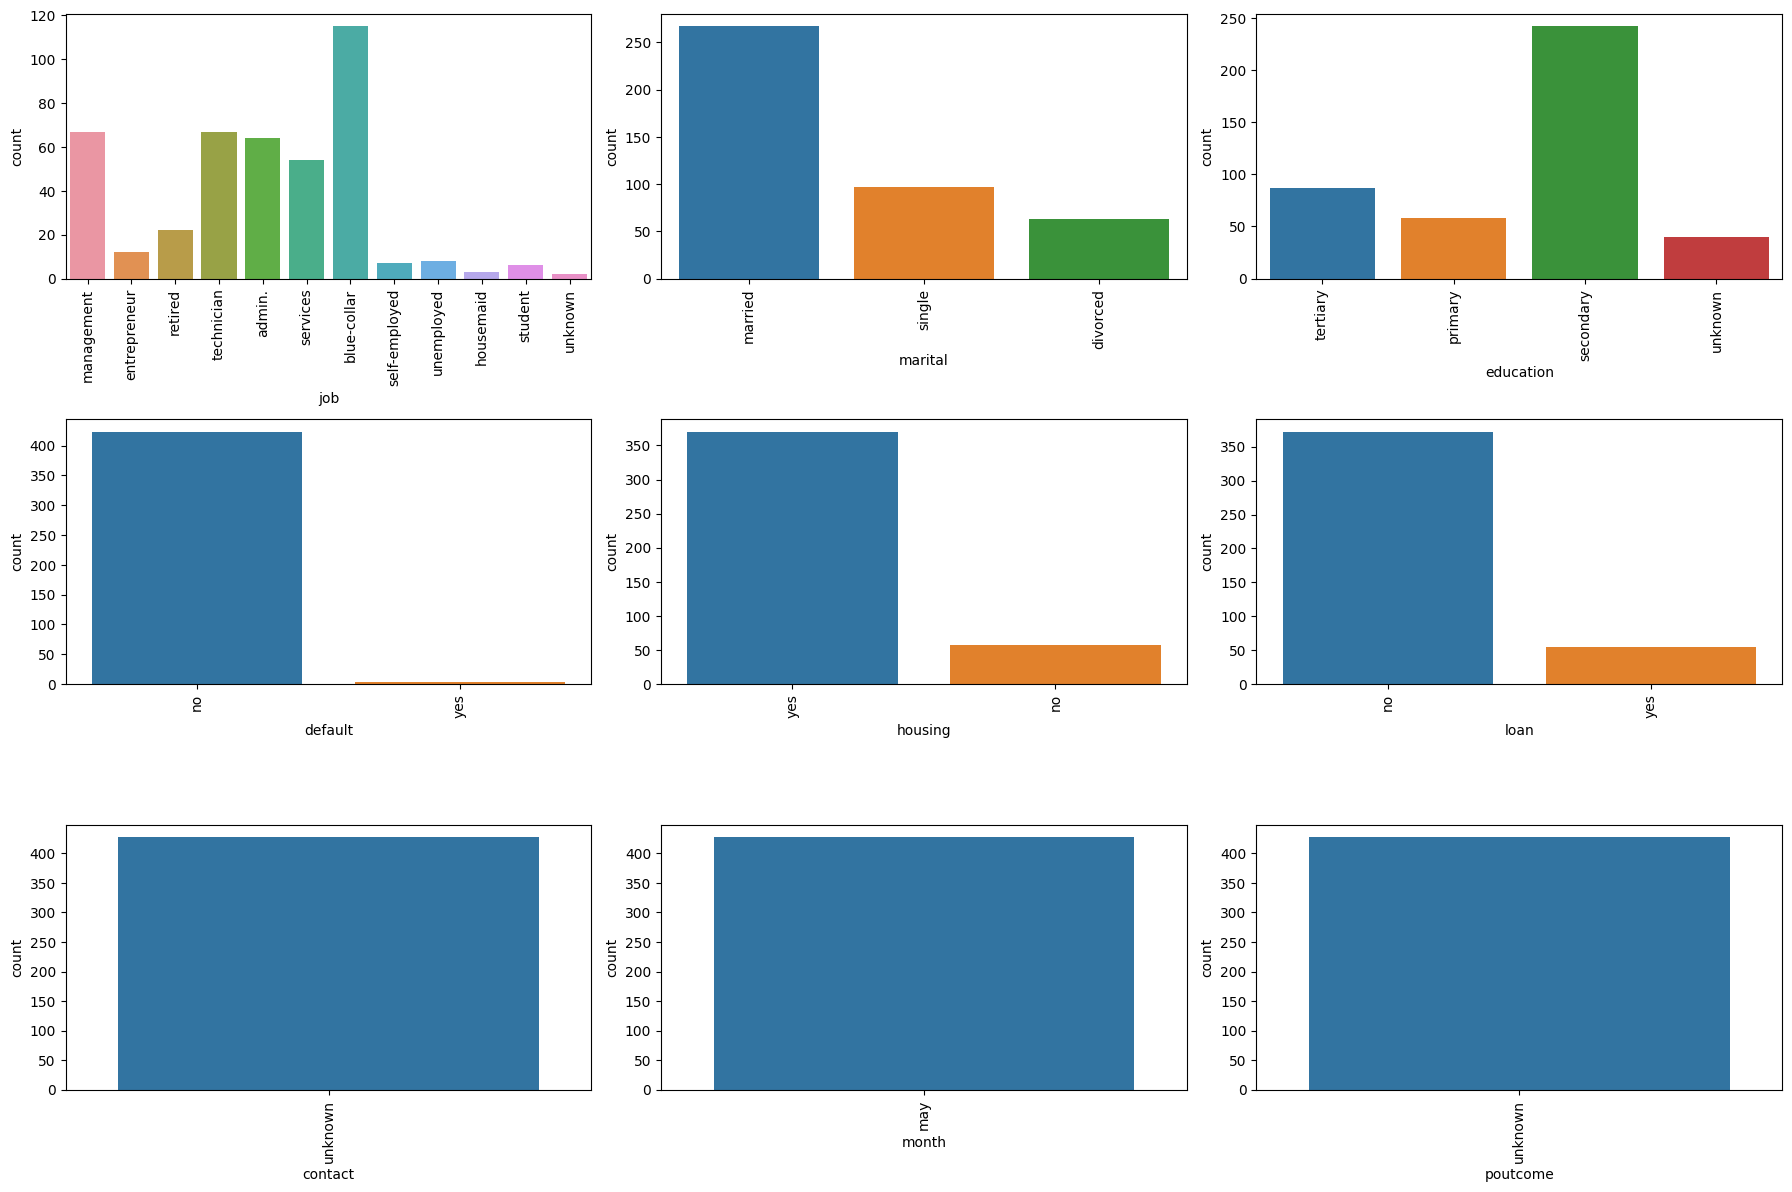

In [20]:
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
for ax in axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(90)

sns.countplot(ax=axes[0, 0], data=test, x='job')
sns.countplot(ax=axes[0, 1], data=test, x='marital')
sns.countplot(ax=axes[0, 2], data=test, x='education')
sns.countplot(ax=axes[1, 0], data=test, x='default')
sns.countplot(ax=axes[1, 1], data=test, x='housing')
sns.countplot(ax=axes[1, 2], data=test, x='loan')
sns.countplot(ax=axes[2, 0], data=test, x='contact')
sns.countplot(ax=axes[2, 1], data=test, x='month')
sns.countplot(ax=axes[2, 2], data=test, x='poutcome')

fig.tight_layout(pad=1.0)
 
plt.show()

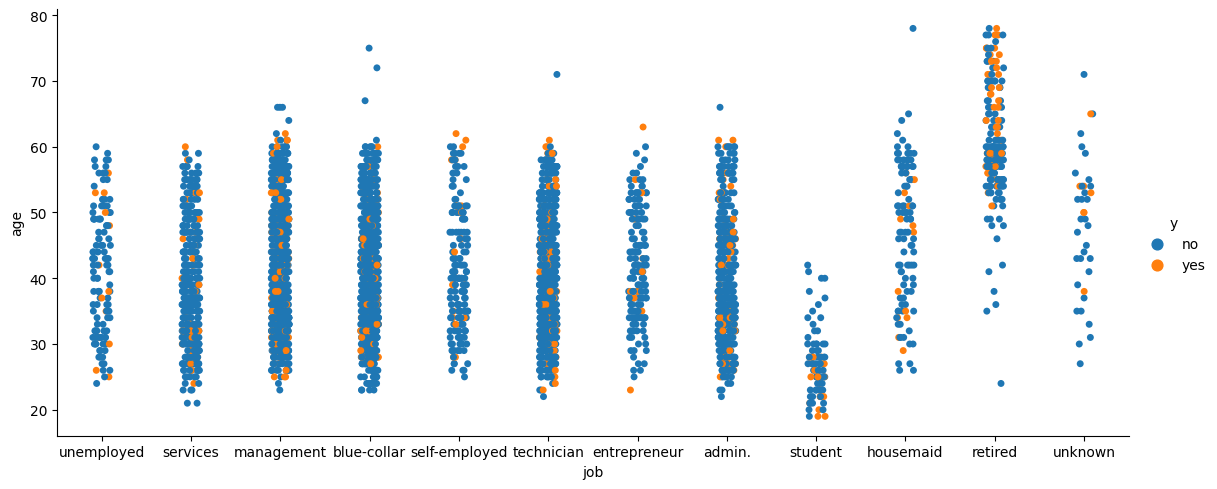

In [21]:
sns.catplot(data = train, x = "job", y = "age", hue = "y", aspect = 2.3,height = 5)

<b style="color:red">Insights</b>
<p><b>(1)In Dataset, Mostly clients are retired.<br>(2)very few Blue collar,enterpreneur and students have positive respose.<b></p>

<AxesSubplot:xlabel='marital,y'>

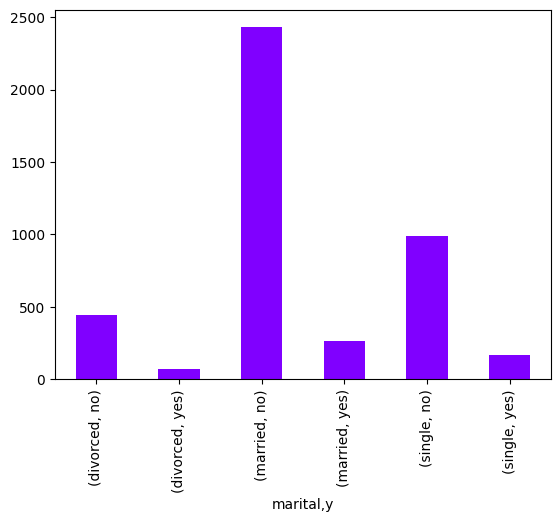

In [22]:
train.groupby(["marital","y"])["age"].count().plot(kind = "bar",cmap = "rainbow" )

### Check target is balanced or imbalanced

<AxesSubplot:xlabel='y', ylabel='count'>

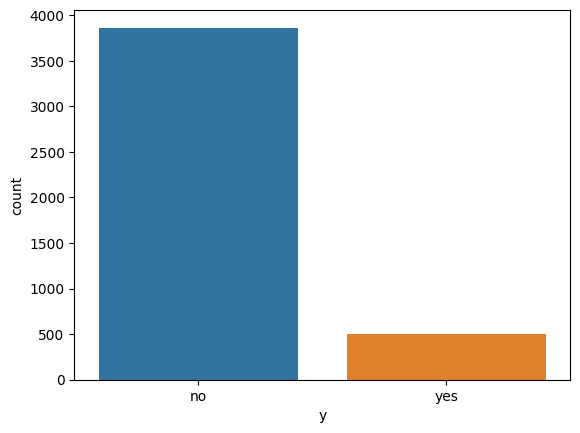

In [23]:
sns.countplot(train['y'])

<b style="color:red">Insights</b>
<p><b>Previous campaign contact with client not important for recent campaign<br> So we can drop this column.<b></p>

### Encoding

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
co_cols=train.select_dtypes(include='O').columns
for i in co_cols:
    train[i]=le.fit_transform(train[i])

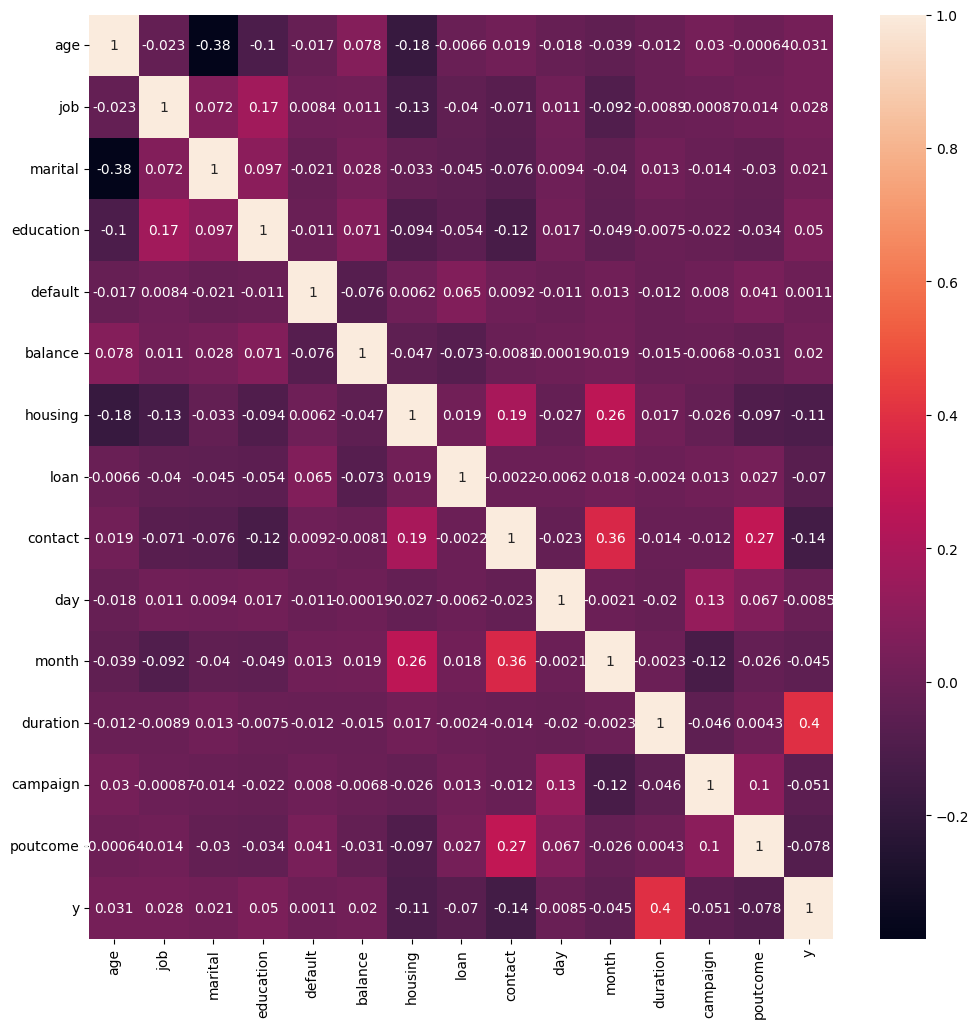

In [25]:
plt.figure(figsize=(12,12))
sns.heatmap(data=train.corr(),annot=True)
plt.show()

In [26]:
X_train=train.iloc[:,:-1]
y_train=train.iloc[:,-1]
X_train.shape,y_train.shape

((4369, 14), (4369,))

### Balance the imbalanced Data using SMOTE

In [27]:
from imblearn.over_sampling import SMOTE
r=SMOTE(sampling_strategy='auto')
X_train, y_train=r.fit_resample(X_train,y_train)

In [28]:
y_train.value_counts()

0    3863
1    3863
Name: y, dtype: int64

<b style="color:red">Insights</b>
<p><b>Now Data are Balanced<b></p>

### Creating The Function to Fit and predict the Model

In [29]:
from sklearn.metrics import classification_report,roc_auc_score
def model_prediction(model):
    model.fit(X_train,y_train)
    y_pred_train=model.predict(X_train)
    print("=="*50)
    print('Model Name:',model)
    print("--"*50)
    print("Classifiction Report:")
    print("--"*50)
    print(classification_report(y_train,y_pred_train))
    print("--"*50)
    print("roc_auc_score:",roc_auc_score(y_train,y_pred_train))
    print("=="*50)

### Model: Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model_prediction(lr)

Model Name: LogisticRegression()
----------------------------------------------------------------------------------------------------
Classifiction Report:
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      3863
           1       0.81      0.78      0.80      3863

    accuracy                           0.80      7726
   macro avg       0.80      0.80      0.80      7726
weighted avg       0.80      0.80      0.80      7726

----------------------------------------------------------------------------------------------------
roc_auc_score: 0.7978255242039864


<b style="color:red">Insights</b>
<p><b>(1)Logistic Regression model has 79% Accuracy.<br>(2)According to roc auc score Model is Good but not better.</b></p>

### Model: Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(class_weight='balanced')
model_prediction(rf)

Model Name: RandomForestClassifier(class_weight='balanced')
----------------------------------------------------------------------------------------------------
Classifiction Report:
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3863
           1       1.00      1.00      1.00      3863

    accuracy                           1.00      7726
   macro avg       1.00      1.00      1.00      7726
weighted avg       1.00      1.00      1.00      7726

----------------------------------------------------------------------------------------------------
roc_auc_score: 1.0


<b style="color:red">Insights</b>
<p><b>(1)Random Forest model has 100% Accuracy. It's Overfitting<br>(2)According to roc auc score Model is not good.<b></p>

### Model: Extra Gradient Boosting

In [32]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
model_prediction(xgb)

Model Name: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)
----------------------------------------------------------------------------------------------------
Classifiction Report:
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   supp

<b style="color:red">Insights</b>
<p><b>(1)XGBoost model has 100% Accuracy. It's Overfitting on Data.<br>(2)According to roc auc score Model is not Good.<b></p>

### Model: AdaBoost

In [33]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
model_prediction(ada)

Model Name: AdaBoostClassifier()
----------------------------------------------------------------------------------------------------
Classifiction Report:
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      3863
           1       0.88      0.88      0.88      3863

    accuracy                           0.88      7726
   macro avg       0.88      0.88      0.88      7726
weighted avg       0.88      0.88      0.88      7726

----------------------------------------------------------------------------------------------------
roc_auc_score: 0.8818275951333161


<b style="color:red">Insights</b>
<p><b>(1)AdaBoost model has 89% Accuracy. It's not Bad Model<br>(2)According to roc auc score Model is Good. So Using Hyperparameter tunning we can this model much better.<b></p>

### HyperParameter Tunning on AdaBoost

In [34]:
from sklearn.model_selection import GridSearchCV
param_grid={'n_estimators':[100,200,300,400],
           "learning_rate":[0.1,0.01,0.001,1],
           "algorithm":["SAMME","SAMME.R"]
           }
gscv=GridSearchCV(ada,param_grid=param_grid,scoring="f1",cv=5,n_jobs=-1)
model_prediction(gscv)

Model Name: GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.01, 0.001, 1],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='f1')
----------------------------------------------------------------------------------------------------
Classifiction Report:
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      3863
           1       0.90      0.91      0.90      3863

    accuracy                           0.90      7726
   macro avg       0.90      0.90      0.90      7726
weighted avg       0.90      0.90      0.90      7726

----------------------------------------------------------------------------------------------------
roc_auc_score: 0.904607817758219


<b style="color:red">Insights</b>
<p><b>(1)Hyper parameter tuning on AdaBoost model has 90% Accuracy.<br>(2)According to roc auc score Model is better Model.<br>(3)so we can test the Data<b></p>

In [35]:
le=LabelEncoder()
co_cols=test.select_dtypes(include='O').columns
for i in co_cols:
    test[i]=le.fit_transform(test[i])
y_test=gscv.predict(test)

In [36]:
test['y']=y_test

In [37]:
test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,y
0,35,4,1,2,0,231,1,0,0,5,0,139,1,0,0
1,28,4,2,2,0,447,1,1,0,5,0,217,1,0,0
2,42,2,0,2,1,2,1,0,0,5,0,380,1,0,1
3,58,5,1,0,0,121,1,0,0,5,0,50,1,0,0
4,43,9,2,1,0,593,1,0,0,5,0,55,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,26,1,2,1,0,82,1,0,0,9,0,654,1,0,1
423,40,1,1,1,0,10,1,0,0,9,0,1692,2,0,1
424,28,1,2,1,0,-197,1,0,0,9,0,2016,2,0,1
425,33,1,0,0,0,390,1,0,0,9,0,665,2,0,1
